In [43]:
'''Importo librerias'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [44]:
'''Ingesto el archivo excel y transformo la fecha en un entero'''
dato = pd.read_excel('bike_train.xlsx')

dato.insert(2, 'dateday',dato['dteday'].map(date.toordinal))


In [45]:
#dato['temp'] = round(dato['temp']*41,2)

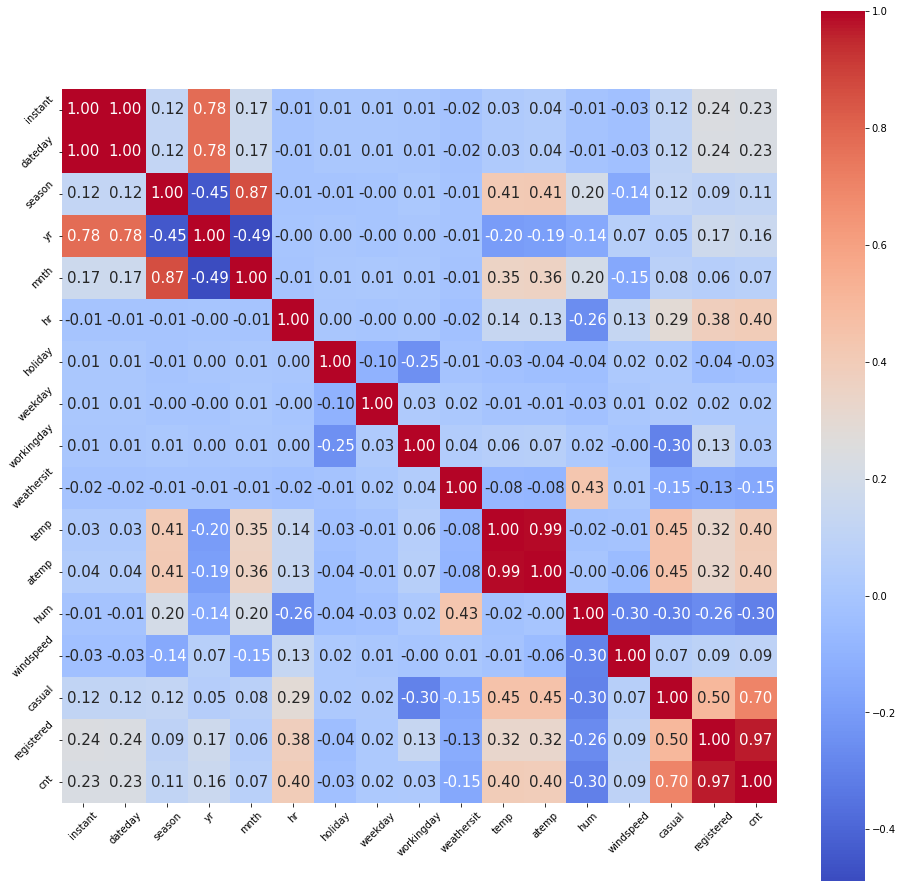

In [46]:

'''Analizo la correlacion de las columnas'''
corr = dato.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()


In [47]:
datos = dato[['dateday','season','hr','weathersit','temp','hum','cnt']]
datos

,dateday,season,hr,weathersit,temp,hum,cnt
0,734138,1,0,1,0.24,0.81,16
1,734138,1,1,1,0.22,0.80,40
2,734138,1,2,1,0.22,0.80,32
3,734138,1,3,1,0.24,0.75,13
4,734138,1,4,1,0.24,0.75,1
...,...,...,...,...,...,...,...
11994,734642,2,23,1,0.60,0.56,239
11995,734643,2,0,1,0.58,0.53,170
11996,734643,2,1,1,0.56,0.52,130
11997,734643,2,2,1,0.56,0.52,98


Mido nivel de error con algunas columna

In [48]:
from importlib.util import module_for_loader


X_train = np.array(datos[['weathersit']])
y_train = np.array(datos[['cnt']])
modelo = LinearRegression(fit_intercept=True)
modelo.fit(X_train, y_train)
modelo.coef_
from sklearn.metrics import mean_squared_error
y_train_pred = modelo.predict(X_train)
print('Error datos train:', mean_squared_error(y_train, y_train_pred))
RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE

Error datos train: 22403.303659261303


149.67733181501234

In [49]:
X_train = np.array(datos[['hr']])
y_train = np.array(datos[['cnt']])
modelo = LinearRegression(fit_intercept=True)
modelo.fit(X_train, y_train)
modelo.coef_
from sklearn.metrics import mean_squared_error
y_train_pred = modelo.predict(X_train)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE

Error en datos de train: 19311.33777042172


138.96523943210303

In [50]:
X_train = np.array(datos[['temp']])
y_train = np.array(datos[['cnt']])
modelo = LinearRegression(fit_intercept=True)
modelo.fit(X_train, y_train)
modelo.coef_
from sklearn.metrics import mean_squared_error
y_train_pred = modelo.predict(X_train)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE

Error en datos de train: 19328.682438564785


139.0276319246098

In [51]:
X_train = np.array(datos[['hum','temp']])
y_train = np.array(datos[['cnt']])
modelo = LinearRegression(fit_intercept=True)
modelo.fit(X_train, y_train)
modelo.coef_
from sklearn.metrics import mean_squared_error
y_train_pred = modelo.predict(X_train)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE

Error en datos de train: 17319.428663050905


131.60330035014664

In [52]:
X_train = np.array(datos[['dateday','hr']])
y_train = np.array(datos[['cnt']])
modelo = LinearRegression(fit_intercept=True)
modelo.fit(X_train, y_train)
modelo.coef_
from sklearn.metrics import mean_squared_error
y_train_pred = modelo.predict(X_train)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE

Error en datos de train: 18065.879728751588


134.40937366401045

In [53]:
X_train = np.array(datos[['hr','temp','hum','season','weathersit','dateday']])
y_train = np.array(datos[['cnt']])
modelo = LinearRegression(fit_intercept=True)
modelo.fit(X_train, y_train)
modelo.coef_
from sklearn.metrics import mean_squared_error
y_train_pred = modelo.predict(X_train)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE

Error en datos de train: 14434.963069972639


120.14559113830452

In [54]:
'''Pruebo el modelo y visualizo el resultado'''
datos_test = pd.read_excel('bike_test.xlsx')
datos_test.insert(2, 'dateday',datos_test['dteday'].map(date.toordinal))
X_test = np.array(datos_test[['hr','temp','hum','season','weathersit','dateday']])
y_test_pred = modelo.predict(X_test)
y_test_pred


array([[176.8433732 ],
       [171.57867766],
       [191.98972869],
       ...,
       [280.96089764],
       [293.6461275 ],
       [286.24422235]])

In [55]:
'''Lo guardo en un data frame y convierto en csv'''
final = pd.DataFrame(y_test_pred)
final.columns = ['pred']
final['pred'] = final['pred'].astype('int')
final.to_csv('MariaVictoriaAlmandoz.csv', index = False, encoding= 'utf-8')

In [56]:
final.describe()

,pred
count,5380.000000
mean,267.170446
std,80.956936
min,75.000000
25%,200.000000
50%,268.000000
75%,333.000000
max,473.000000
